# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [23]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [4]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


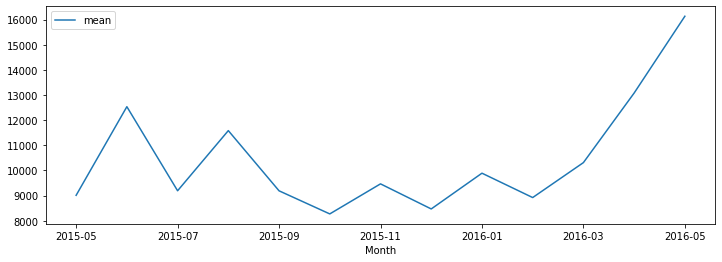

In [24]:
fitbit['Month'] = [r[:7] for r in fitbit['Date']]

msteps = fitbit.groupby('Month').agg(['mean'])['Steps']
msteps.plot(figsize = (12, 4))
plt.savefig('../figures/steps.by_month.jpg')


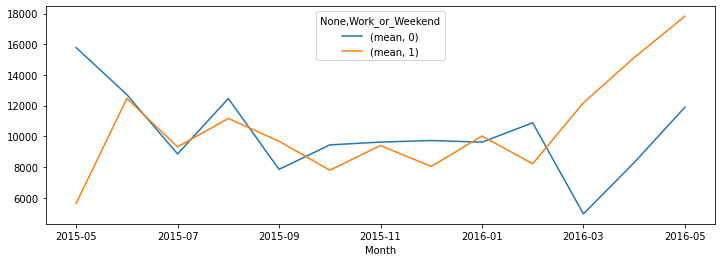

In [27]:
msteps = fitbit.groupby(['Month', 'Work_or_Weekend']).agg(['mean'])['Steps'].unstack().plot(kind = 'line', figsize = (12, 4))

figname = 'Steps_work_or_weekend.jpg'
plt.savefig(f'../figures/{figname}')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

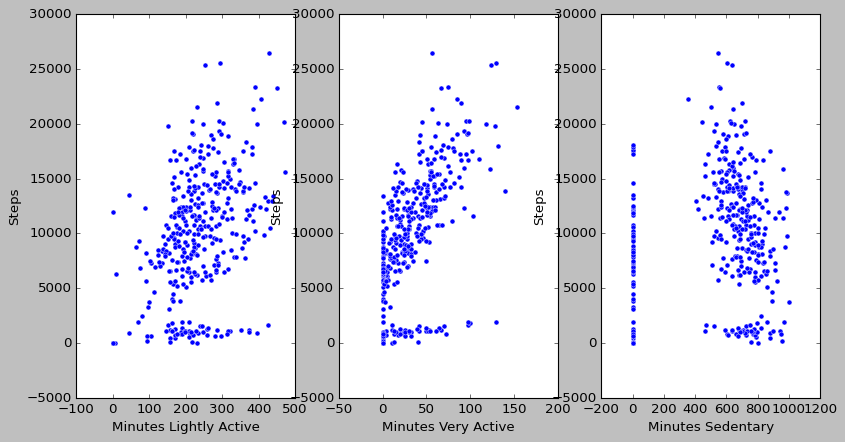

In [26]:
fig, ax = plt.subplots(1, 3)  

features = {#x : # y
            'Minutes Lightly Active' : 'Steps',
            'Minutes Very Active' : 'Steps',
            'Minutes Sedentary' : 'Steps',
            }

i = 0
for x, y in features.items():
    sns.scatterplot(data=fitbit, x= x, y = y, ax = ax[i])
    i += 1

figname = 'Activity_vs_steps.jpg'
plt.savefig(f'../figures/{figname}')

plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [4]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [53]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [47]:
num_vars = titanic.select_dtypes(['int64', 'float64']).columns
num_vars.tolist()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [48]:
cat_vars = titanic.select_dtypes(['object']).columns
cat_vars.tolist()

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [6]:
#sns.set_style(style = 'dark')
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

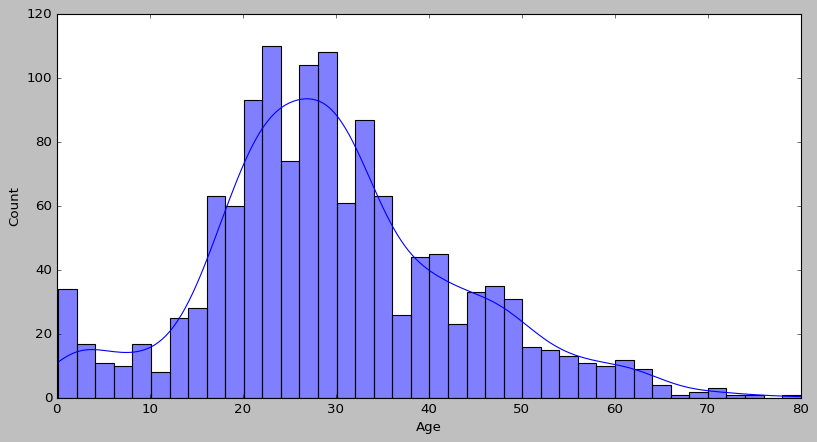

In [56]:
sns.histplot(x=titanic.Age, bins=40, kde = True)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

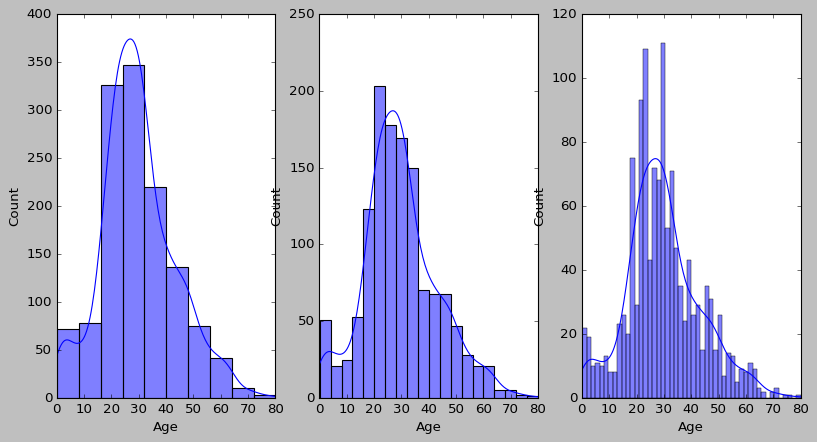

In [59]:
fig, ax = plt.subplots(1, 3) 

bins = [10, 20, 50]

for i, b in zip(range(len(bins)), bins):
    sns.histplot(x=titanic.Age, bins= b, kde = True, ax = ax[i])


#### How does the bin size affect your plot?

In [60]:
"""
The plot getts ruggier the more bins there are.
"""

'\nThe plot getts ruggier the more bins there are.\n'

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

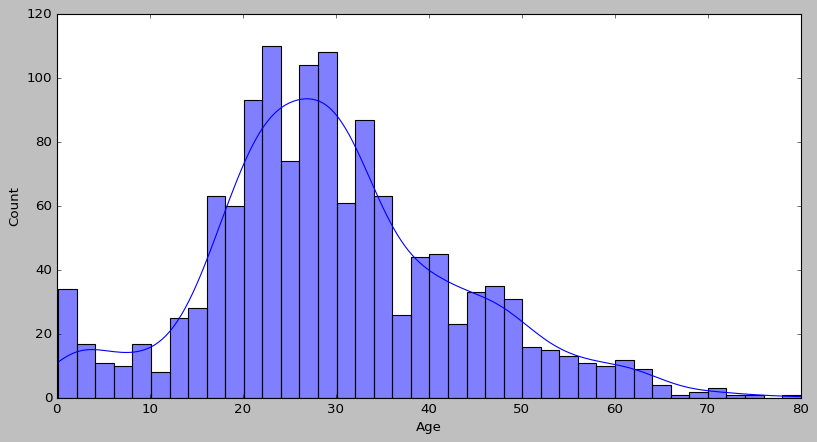

In [21]:
sns.histplot(x=titanic.Age, bins=40, kde = True)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

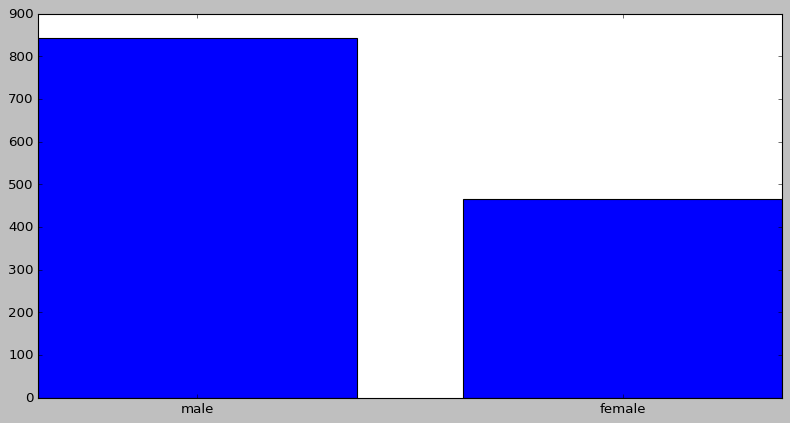

In [72]:
# Method 1 - matplotlib
plt.bar(titanic.Gender.value_counts().index, titanic.Gender.value_counts(), width = 0.75)

#titanic.Gender.value_counts()

<AxesSubplot:xlabel='Gender', ylabel='count'>

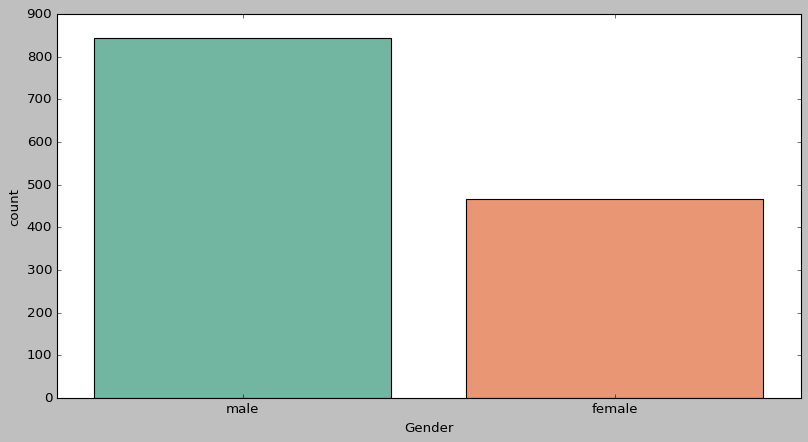

In [65]:
# Method 2 - seaborn
sns.countplot(x=titanic.Gender, palette='Set2')

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

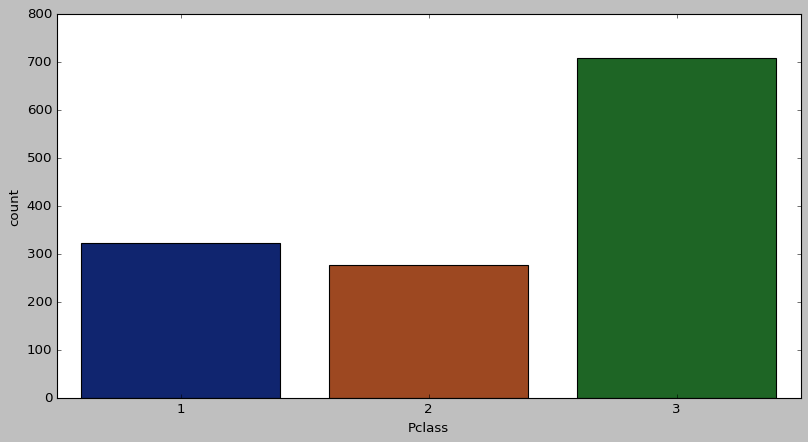

In [77]:
sns.countplot(x = titanic.Pclass, 
              #hue=df.Platform,
              palette='dark')


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

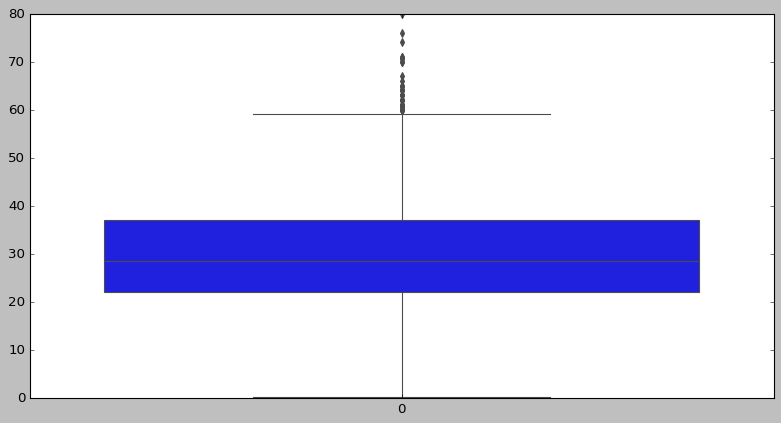

In [74]:
sns.boxplot(data=titanic.Age)

In [78]:
"""
We should use a boxplot, as it presents concisely the relevant summary statistics
"""

'\nWe should use a boxplot, as it presents concisely the relevant summary statistics\n'

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Most passengers are young, with ages between 20 and 40. 
There are also some elderly and children. 
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

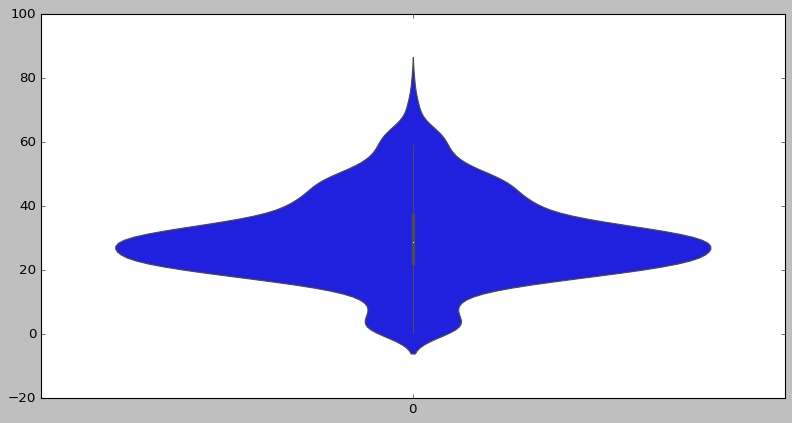

In [81]:
sns.violinplot(data=titanic.Age)

#### What additional information does the last plot provide about feature `Age`?

In [83]:
"""
The mode is around 30 years old. 
There is at least one extreme value referring to a passenger older than 80 years.
"""

'\nThe mode is around 30 years old. \nThere is at least one extreme value referring to a passenger older than 80 years.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

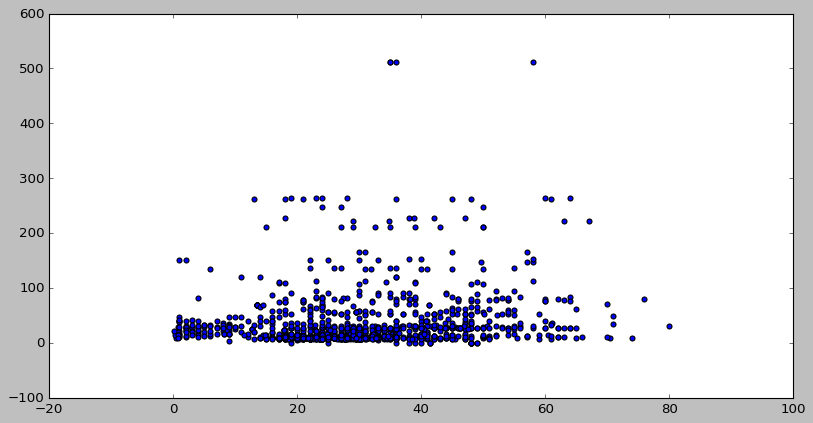

In [8]:
# Method 1 - matplotlib
plt.scatter(x = titanic.Age, y = titanic.Fare)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

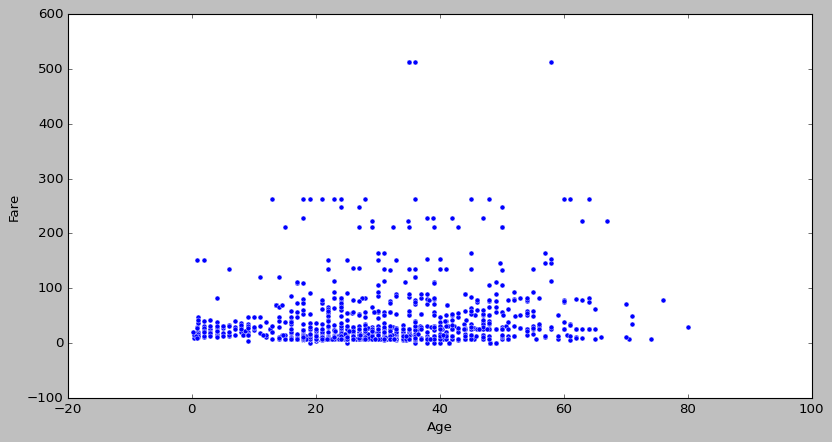

In [9]:
# Method 2 - seaborn
sns.scatterplot(data= titanic, 
                x= 'Age', 
                y= 'Fare')

#### Plot the correlation matrix using seaborn.

In [11]:
# Print correlation matrix
corr = titanic.corr()
corr


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features?

In [12]:
"""
The correlation matrix shows that Fare and Pclass are negatively correlated.
Other correlated features are Parch and SibSP, and Fare and Parch.
"""

'\nThe correlation matrix shows that Fare and Pclass are negatively correlated.\nOther correlated features are Parch and SibSP, and Fare and Parch.\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

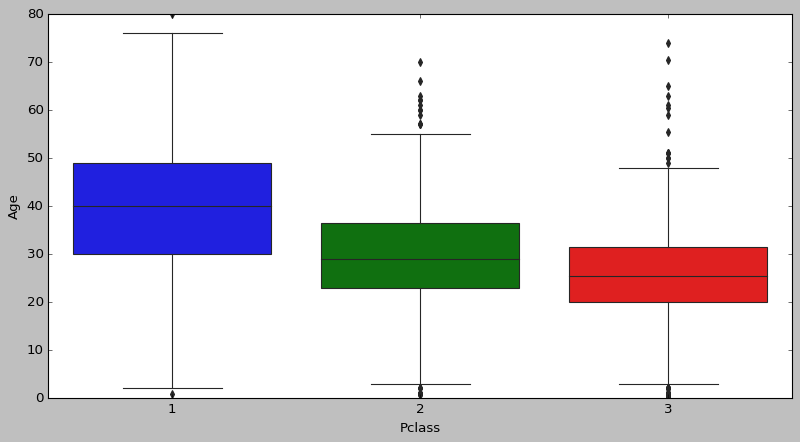

In [15]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

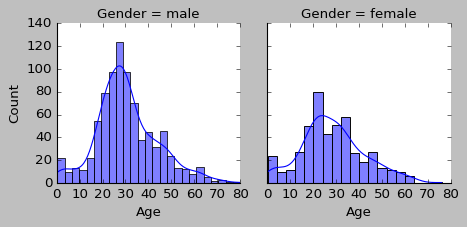

In [20]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age", kde = True)